<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.3: Stacking

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667
    - **ROC AUC**  = 0.9614
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious, iterative and interactive process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data (breast-cancer-wisconsin-data-old.csv)
- Perform some basic structural cleaning to facilitate the work

In [400]:
# Import libraries
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import matplotlib.gridspec as gridspec

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.tree import plot_tree
from sklearn import tree
import pydotplus
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, auc, roc_curve, roc_auc_score

from mlxtend.classifier import StackingClassifier
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

import matplotlib.gridspec as gridspec
%matplotlib inline

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

In [401]:
col_names = ['code', 'clump_thickness' , 'uniformity_cell_size' , 'uniformity_cell_shape' , 'marginal_adhesion' , 'single_epithelial_cell_size' , 'bare_nuclei' , 'bland_chromatin' , 'normal_nucleoli' , 'mitoses' , 'class']
df = pd.read_csv("breast-cancer-wisconsin-data-old.csv", header=None, names=col_names)

In [402]:
df

,code,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
code                           699 non-null int64
clump_thickness                699 non-null int64
uniformity_cell_size           699 non-null int64
uniformity_cell_shape          699 non-null int64
marginal_adhesion              699 non-null int64
single_epithelial_cell_size    699 non-null int64
bare_nuclei                    699 non-null object
bland_chromatin                699 non-null int64
normal_nucleoli                699 non-null int64
mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [404]:
df.isnull().sum()

code                           0
clump_thickness                0
uniformity_cell_size           0
uniformity_cell_shape          0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

In [405]:
df['bare_nuclei'] = df['bare_nuclei'].replace('?', np.nan)

In [406]:
df['bare_nuclei'] =df['bare_nuclei'].fillna(0)

In [407]:
df['bare_nuclei'] = df['bare_nuclei'].astype(int)

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
code                           699 non-null int64
clump_thickness                699 non-null int64
uniformity_cell_size           699 non-null int64
uniformity_cell_shape          699 non-null int64
marginal_adhesion              699 non-null int64
single_epithelial_cell_size    699 non-null int64
bare_nuclei                    699 non-null int32
bland_chromatin                699 non-null int64
normal_nucleoli                699 non-null int64
mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: int32(1), int64(10)
memory usage: 57.5 KB


In [409]:
df['bare_nuclei']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nuclei, Length: 699, dtype: int32

In [410]:
df[['code', 'bare_nuclei']][df['bare_nuclei'] == '?']

C:\Users\65911\anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,code,bare_nuclei


In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
code                           699 non-null int64
clump_thickness                699 non-null int64
uniformity_cell_size           699 non-null int64
uniformity_cell_shape          699 non-null int64
marginal_adhesion              699 non-null int64
single_epithelial_cell_size    699 non-null int64
bare_nuclei                    699 non-null int32
bland_chromatin                699 non-null int64
normal_nucleoli                699 non-null int64
mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: int32(1), int64(10)
memory usage: 57.5 KB


In [412]:
df['class'].unique()

array([2, 4], dtype=int64)

In [413]:
df['class'] = df['class'].replace([2,4], [0,1])
df['class'].unique()

array([0, 1], dtype=int64)

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [414]:
df.describe()

,code,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,0.344778
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.475636
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [415]:
df.shape

(699, 11)

In [416]:
df

,code,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,0
695,841769,2,1,1,1,2,1,1,1,1,0
696,888820,5,10,10,3,7,3,8,10,2,1
697,897471,4,8,6,4,3,4,10,6,1,1


In [417]:
#split dataset in features and target variable
feature_cols = ['clump_thickness' , 'uniformity_cell_size' , 'uniformity_cell_shape' , 'marginal_adhesion' , 'single_epithelial_cell_size' , 'bare_nuclei' , 'bland_chromatin' , 'normal_nucleoli' , 'mitoses']
X = df[feature_cols] # Features
y = df['class'] # Target variable

In [418]:
X.head()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [419]:
y.unique()

array([0, 1], dtype=int64)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)? 
Clump_Thickness, Uniformity_of_Cell_Size, Uniformity_of_Cell_Shape, Marginal_Adhesion, Single_Epithelial_Cell_Size, Bare_Nuclei, Bland_Chromatin, Normal_Nucleoli, Mitoses
- Is there an output variable (label)? Yes
- If there is an output variable:
    - What is it? Class (Benign or malignant 
    - What is its type? Int
- What type of Modelling is it?
    - [X] Supervised <-- this one
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [X] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [420]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

(i) Use Decision Tree as base classifier
(ii) Use AdaBoost for boosting

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

## Classifier with Gaussian, SVM, and log reg

In [421]:
clf1 = GaussianNB()
clf1 = clf1.fit(X_train, y_train)
print('Gaussian training accuracy: %.4f' % clf1.score(X_train, y_train))

clf2 = SVC()
clf2 = clf2.fit(X_train, y_train)
print('SVM training accuracy: %.4f' % clf2.score(X_train, y_train))

lg = LogisticRegression()
lg = lg.fit(X_train, y_train)
print('Logreg training accuracy: %.4f' % lg.score(X_train, y_train))

clf3 = RandomForestClassifier(n_estimators = 10, random_state = 1)
clf3.fit(X_train, y_train)
print('Randomforest training accuracy: %.4f' % clf3.score(X_train, y_train))

clf4 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 31, min_samples_leaf = 8, min_samples_split = 7, splitter = 'random')
clf4.fit(X_train, y_train)
print('Decision Tree training accuracy: %.4f' % clf4.score(X_train, y_train))


# create the ensemble model
sclf = StackingClassifier(classifiers = [clf1, clf2, clf3, clf4],
                            meta_classifier = lg)
sclf.fit(X_train, y_train)

print()

print('Gaussian test accuracyn: %.4f' % clf1.score(X_test, y_test))
print('SVM test accuracy: %.4f' % clf2.score(X_test, y_test))
print('RandomForest test accuracy: %.4f' % clf3.score(X_test, y_test))
print('Logreg test accuracy: %.4f' % lg.score(X_test, y_test))
print('DT test accuracy: %.4f' % clf4.score(X_test, y_test))

print('Stacking training accuracy: %.4f' % sclf.score(X_train, y_train))
print('Stacking test accuracy: %.4f' % sclf.score(X_test, y_test))

Gaussian training accuracy: 0.9624
SVM training accuracy: 0.9767
Logreg training accuracy: 0.9696
Randomforest training accuracy: 0.9964
Decision Tree training accuracy: 0.9678

Gaussian test accuracyn: 0.9571
SVM test accuracy: 0.9714
RandomForest test accuracy: 0.9714
Logreg test accuracy: 0.9714
DT test accuracy: 0.9571
Stacking training accuracy: 0.9928
Stacking test accuracy: 0.9714


In [422]:
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
results = cross_val_score(sclf, X_train, y_train, cv = kfold)

print('Stacking, Cross-Validation mean: %.4f' % results.mean())

Stacking, Cross-Validation mean: 0.9589


In [423]:

y_train_pred = clf1.predict(X_train)
y_test_pred = clf1.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Gaussian train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

Gaussian train/test accuracies 0.962/0.957


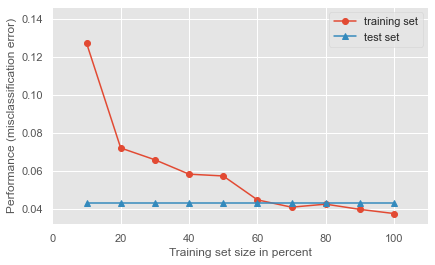

In [424]:
# plot learning curves GNB
   
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, clf1, print_model = False, style = 'ggplot')
plt.show()

In [425]:
y_train_pred = clf2.predict(X_train)
y_test_pred = clf2.predict(X_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)
print('SVC train/test accuracies %.3f/%.3f' % (train_score, test_score))

SVC train/test accuracies 0.977/0.971


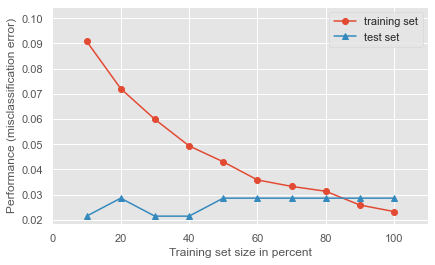

In [426]:
# plot learning curves SVM
   
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, clf2, print_model = False, style = 'ggplot')
plt.show()

In [427]:
lg = lg.fit(X_train, y_train)
y_train_pred = lg.predict(X_train)
y_test_pred = lg.predict(X_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)
print('Log Regression train/test accuracies %.3f/%.3f' % (train_score, test_score))

Log Regression train/test accuracies 0.970/0.971


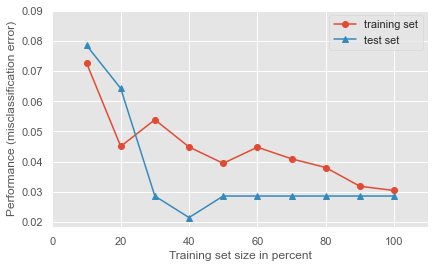

In [428]:
# plot learning curves SVM
   
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, lg, print_model = False, style = 'ggplot')
plt.show()

In [429]:
clf4 = clf4.fit(X_train, y_train)
y_train_pred = clf4.predict(X_train)
y_test_pred = clf4.predict(X_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)
print('DT train/test accuracies %.3f/%.3f' % (train_score, test_score))

DT train/test accuracies 0.961/0.957


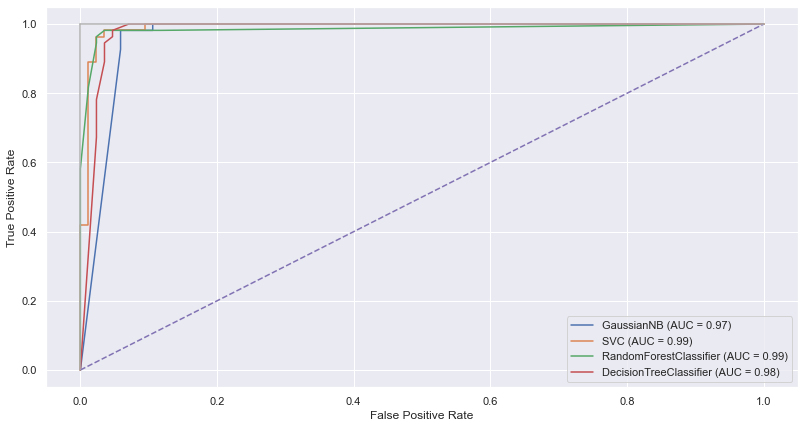

In [430]:
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots(1,1, figsize=(12,7))

plot_roc_curve(clf1, X_test, y_test, ax=ax)
plot_roc_curve(clf2, X_test, y_test, ax=ax)
plot_roc_curve(clf3, X_test, y_test, ax=ax)
plot_roc_curve(clf4, X_test, y_test, ax=ax)

plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [431]:
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

************
* Gaussian *
************
Accuracy : 0.9624 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9146 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9785 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9665                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


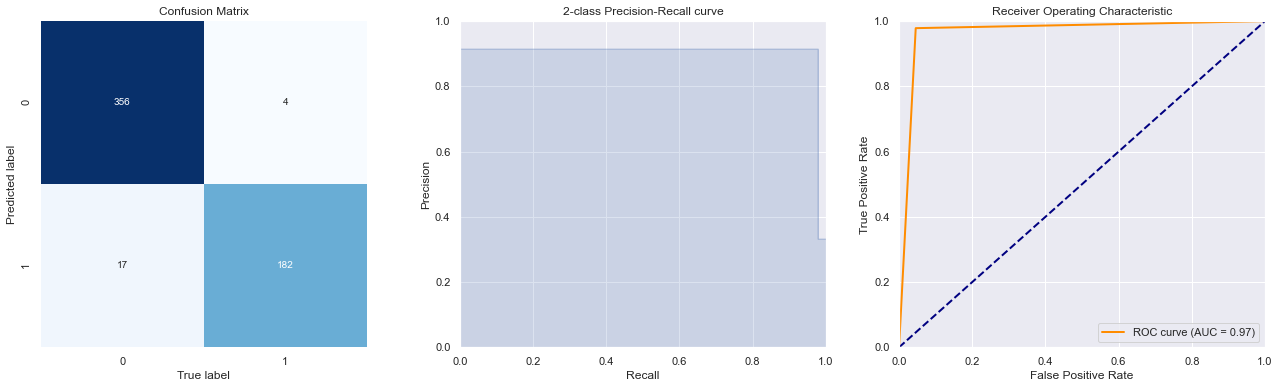


*******
* SVM *
*******
Accuracy : 0.9767 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9482 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9839 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9785                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


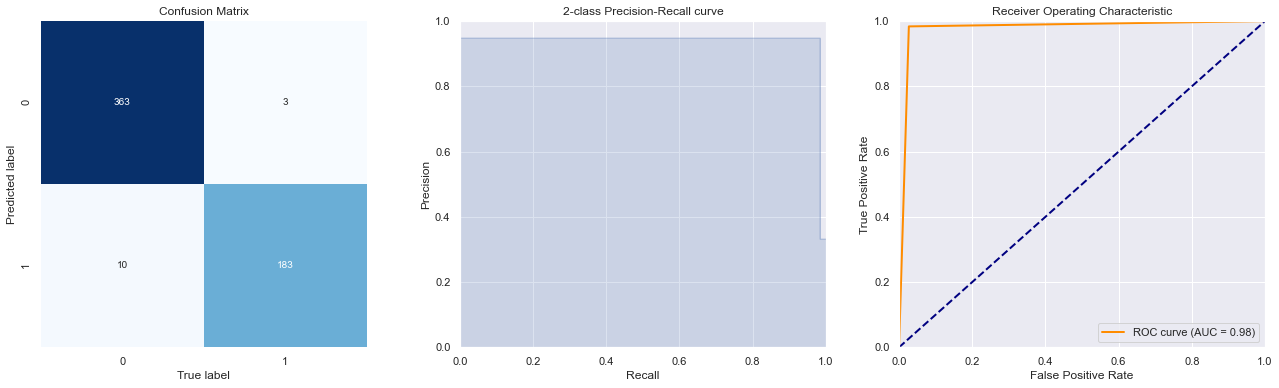


*****************
* Random Forest *
*****************
Accuracy : 0.9964 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9946 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9946 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9960                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


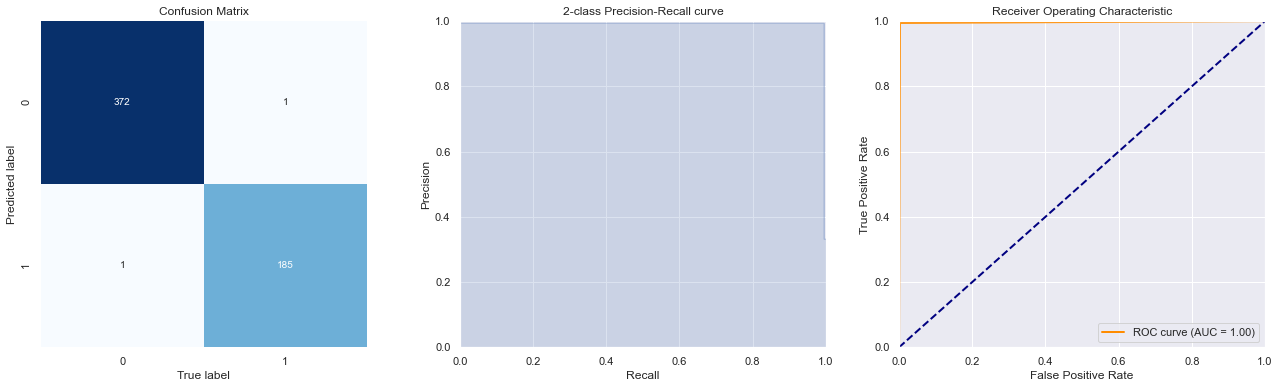


*****************
* Decision Tree *
*****************
Accuracy : 0.9606 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9505 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9301 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9530                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


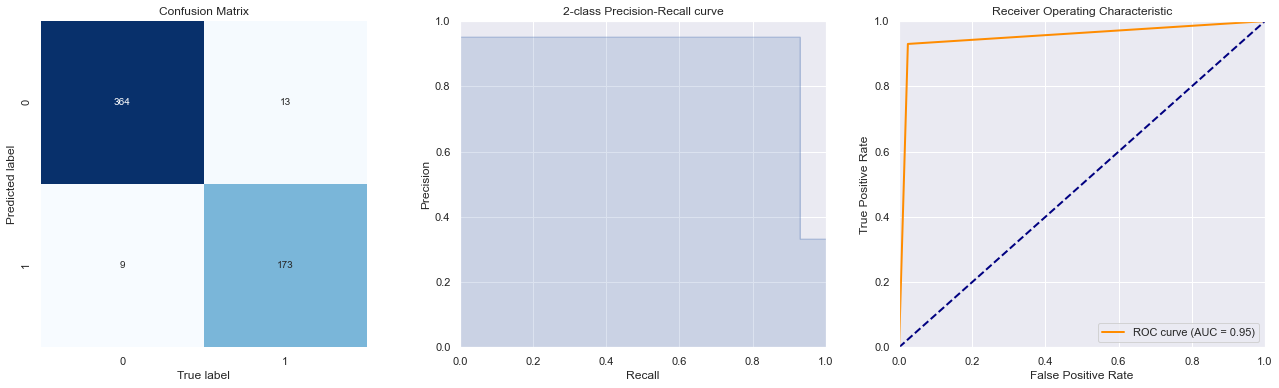


***********************
* Logistic Regression *
***********************
Accuracy : 0.9696 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9519 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9570 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9664                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


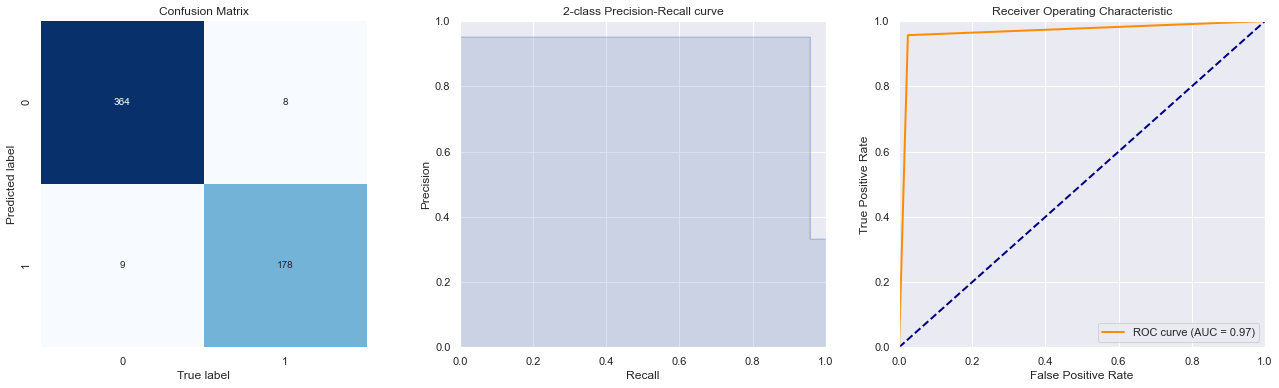


************
* Stacking *
************
Accuracy : 0.9928 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9946 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9839 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9906                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


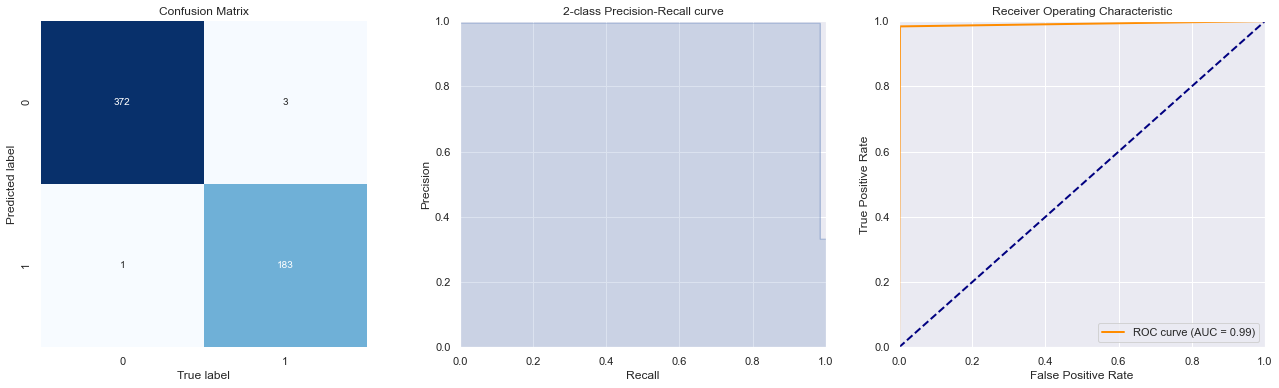

In [432]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

models = ['Gaussian', 'SVM', 'Random Forest','Decision Tree', 'Logistic Regression', 'Stacking']
for i, m in enumerate([clf1, clf2, clf3, clf4, lg, sclf]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(X_train)
    # show the report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
    print()

# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

Accuracy : 0.9714 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9636 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9636 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9701                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


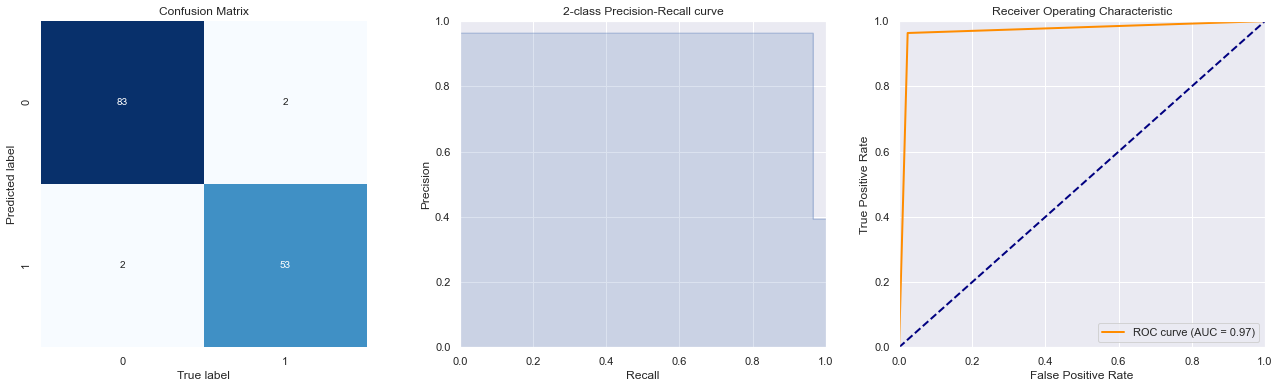

In [433]:
predictions = sclf.predict(X_test)
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
# keep the results
results.loc[len(results)] = {
    'Model': 'Stacking (with test)', 
    'Accuracy': accuracy_, 
    'Precision': precision_,
    'Recall': recall_,
    'ROC_AUC': roc_auc_}
print()

In [434]:
results

,Model,Accuracy,Precision,Recall,ROC_AUC
0,Gaussian,0.962433,0.914573,0.978495,0.966459
1,SVM,0.976744,0.948187,0.983871,0.978531
2,Random Forest,0.996422,0.994624,0.994624,0.995971
3,Decision Tree,0.960644,0.950549,0.930108,0.952989
4,Logistic Regression,0.969589,0.951872,0.956989,0.966430
5,Stacking,0.992844,0.994565,0.983871,0.990595
6,Stacking (with test),0.971429,0.963636,0.963636,0.970053


# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [435]:
r = df.iloc[pd.DataFrame(X_test).index[0]]
for i, c in enumerate(df.columns[:-1]):
    print('%-27s: %d' % (c, int(r[i])))
print('%-27s: %s' % (df.columns[-1], 'Benign' if r[-1] == 2 else 'Malignant'))
print('%-27s: %s' % ('Prediction', 'Benign' if predictions[0] == 0 else 'Malignant'))

code                       : 1296025
clump_thickness            : 4
uniformity_cell_size       : 1
uniformity_cell_shape      : 2
marginal_adhesion          : 1
single_epithelial_cell_size: 2
bare_nuclei                : 1
bland_chromatin            : 1
normal_nucleoli            : 1
mitoses                    : 1
class                      : Malignant
Prediction                 : Benign


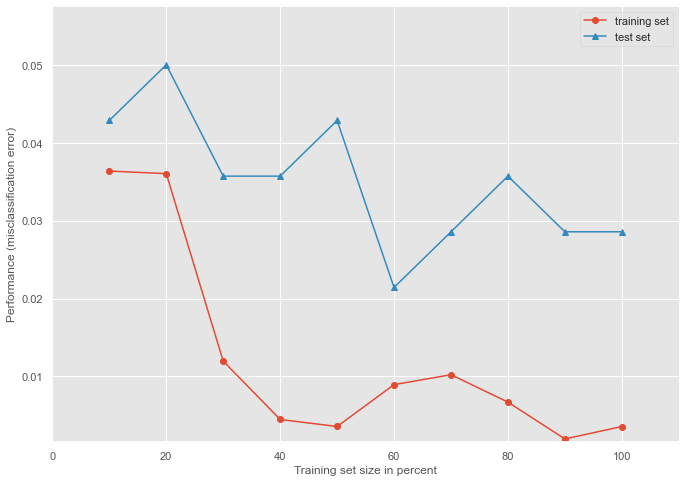

In [436]:
from mlxtend.plotting import plot_learning_curves
  
plt.figure(figsize=(10,8))
plot_learning_curves(X_train, y_train, X_test, y_test, sclf, print_model = False, style = 'ggplot')
plt.show()

In [437]:
label = ['Gaussian', 'SVM', 'Random Forest','Decision Tree', 'Stacking']
clf_list = [clf1, clf2, clf3, clf4, sclf]
    
fig = plt.figure(figsize = (10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0, 1], repeat = 2)

clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X_train, y_train, cv = kfold, scoring = 'accuracy')
    print('Accuracy: %.3f (+/- %.3f) [%s]' % (scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())

Accuracy: 0.962 (+/- 0.025) [Gaussian]
Accuracy: 0.964 (+/- 0.026) [SVM]
Accuracy: 0.957 (+/- 0.016) [Random Forest]
Accuracy: 0.950 (+/- 0.018) [Decision Tree]


<Figure size 720x576 with 0 Axes>

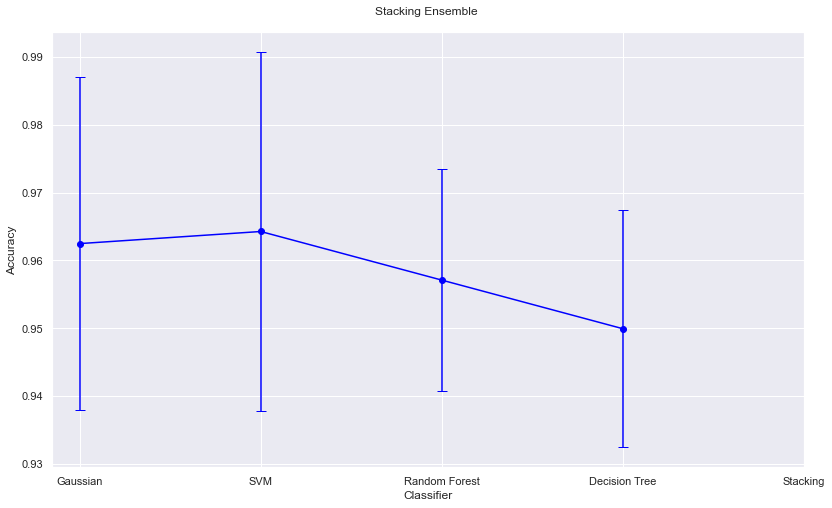

In [439]:
# Ensemble Size
# plot classifier accuracy    
plt.figure(figsize=(12,8))
(_, caps, _) = plt.errorbar(
    range(4),
    clf_cv_mean,
    yerr = clf_cv_std,
    c = 'blue',
    fmt = '-o',
    capsize = 5)

for cap in caps:
    cap.set_markeredgewidth(1)  
    
plt.title('Stacking Ensemble \n')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.xticks(range(5), ['Gaussian', 'SVM', 'Random Forest','Decision Tree', 'Stacking'])     
plt.show()



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



